# Part II - Insights from the Ford GoBike System
## by Ammar yasser

## Investigation Overview


my analysis aimed to explore user behavior and trip patterns in the Ford GoBike system. The key insights revealed that most trips lasted under 16 minutes, with a few outliers exceeding 83 minutes. Subscribers dominated the user base, using the service consistently, while occasional customers took longer trips on average. The majority of riders were male, and the age distribution showed that most users were born between 1980 and 2000, though some unrealistic birth years suggested data entry errors. Peak usage times varied by day, with weekday trips concentrated around 8 AM and 5-6 PM, indicating commuter behavior, while weekends saw more activity in the afternoon, likely for leisure purposes.


## Dataset Overview and Executive Summary

The dataset contains trip data from the Ford GoBike bike-sharing system, including details on trip duration, user type, gender, and birth year. The data revealed significant patterns in user behavior, with clear differences between subscribers and customers, as well as notable trends in trip duration, daily usage, and demographics. These insights will be visualized to provide a deeper understanding of how people use the system and what factors influence their riding habits.

In [21]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [22]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### How is the distribution of trip durations? Are there any unusual patterns?How long do most bike trips last, and are there any extreme outliers?


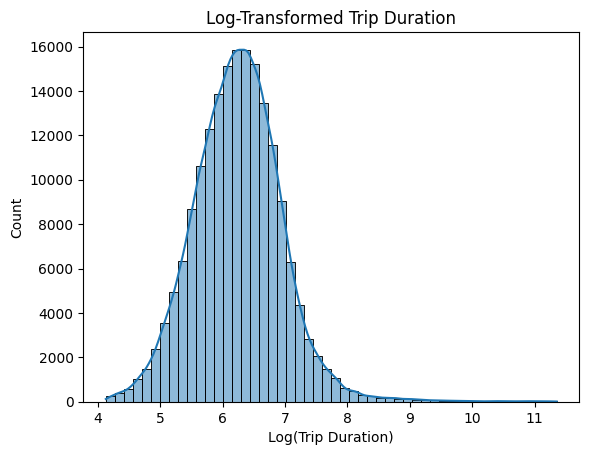

In [17]:
# Check for skewness
skewness = df['duration_sec'].skew()

# If the skewness is high, apply log transformation
if skewness > 1:
    df['log_duration_sec'] = np.log1p(df['duration_sec'])  # log(1 + x) to handle zero values
    log_skewness = df['log_duration_sec'].skew()

    # Plot log-transformed distribution
    sns.histplot(df['log_duration_sec'], bins=50, kde=True)
    plt.xlabel('Log(Trip Duration)')
    plt.ylabel('Count')
    plt.title(f'Log-Transformed Trip Duration')
plt.show()


- Most trips last under 1000 seconds (~16 minutes)
- There is a long tail, meaning some trips last much longer
- Some extreme outliers exceed 5000 seconds (~83 minutes)
---

### Is bike-sharing a popular choice among riders, or do most prefer solo trips?

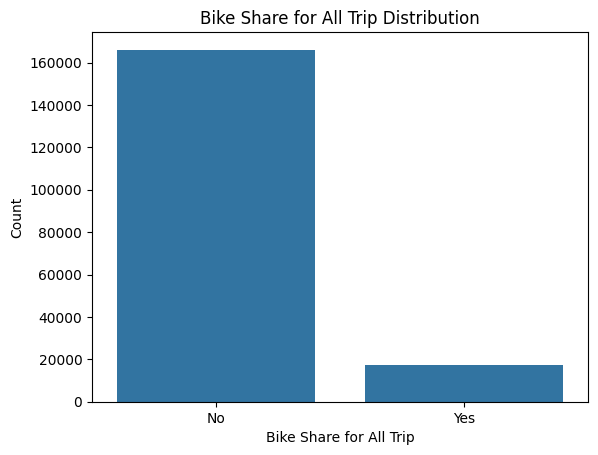

In [18]:
sns.countplot(x=df['bike_share_for_all_trip'], 
             color="tab:blue",  # Muted red and muted green hex codes
              order=["No", "Yes"])
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Count')
plt.title('Bike Share for All Trip Distribution')
plt.show()

- Most trips were **not** shared for the entire duration.  
- The count for "No" is significantly higher than "Yes."  
- Bike-sharing for entire trips is relatively uncommon.  
- Possible reasons include user preferences or system limitations.
---

### At what times of the day do people take the longest trips, and why?

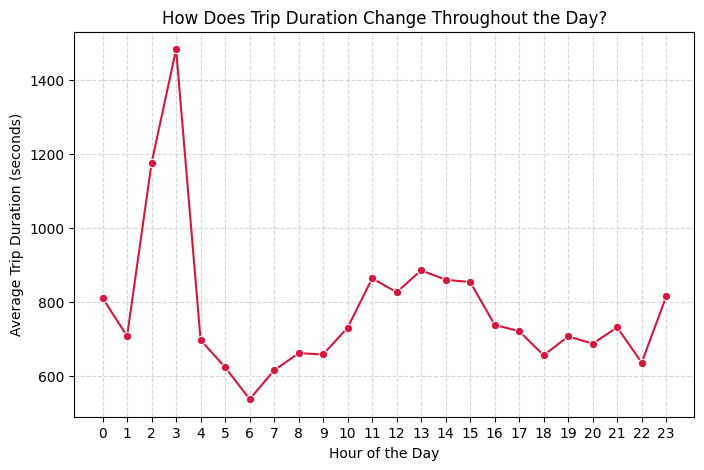

In [19]:
# Line plot of average trip duration by hour of the day
plt.figure(figsize=(8, 5))

# Convert start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

df['hour'] = df['start_time'].dt.hour
avg_duration_per_hour = df.groupby('hour')['duration_sec'].mean()

sns.lineplot(x=avg_duration_per_hour.index, y=avg_duration_per_hour.values, marker="o", color="crimson")
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Duration (seconds)')
plt.title('How Does Trip Duration Change Throughout the Day?')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


- **Morning trips (6 AM - 9 AM) are relatively short**, suggesting people are rushing to work.  

- **Midday and evening rides (12 PM - 7 PM) last longer**, likely due to casual and leisure rides.  

- **Late-night trips (10 PM - 4 AM) are rare but tend to be longer**, possibly recreational.  
---

### Do subscribers and occasional customers use the service differently throughout the day?

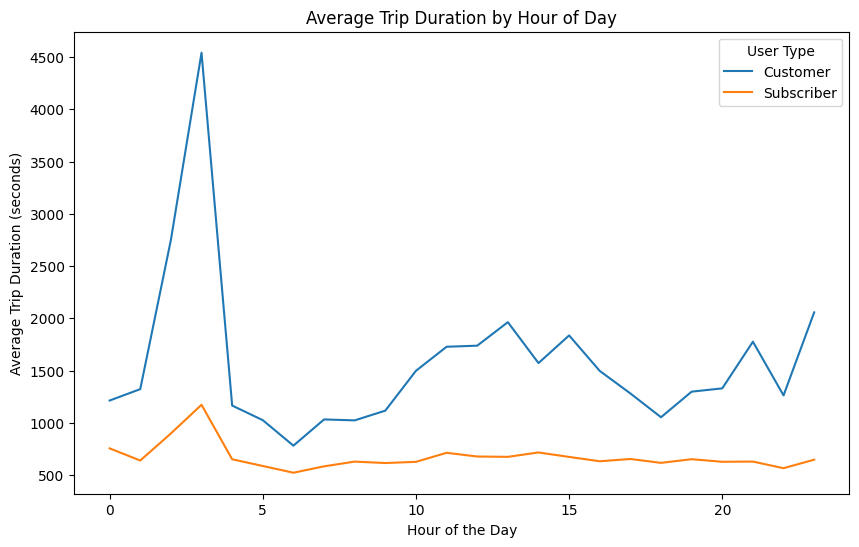

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df.groupby(['hour', 'user_type'])['duration_sec'].mean().reset_index(), 
			 x="hour", y="duration_sec", hue="user_type", ci=None)
plt.title("Average Trip Duration by Hour of Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Trip Duration (seconds)")
plt.legend(title="User Type")
plt.show()

- **Subscribers take shorter trips** and have consistent trip durations throughout the day.  
- **Customers tend to have longer trips**, especially in the afternoon and evening.  
- Both groups show a dip in trip duration early in the morning (~5-6 AM).  